In [112]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs()

k = 3
kmean = KMeans(n_clusters=k, random_state=42)
y_pred = kmean.fit_predict(X)

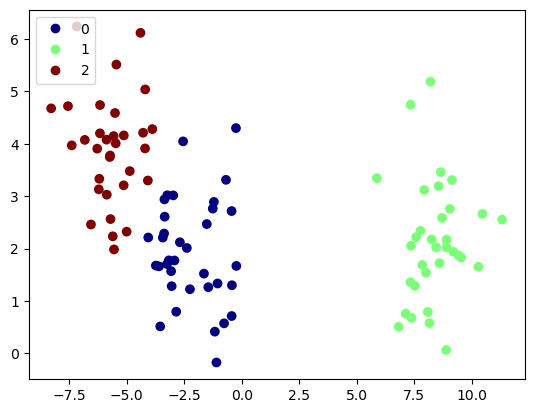

In [113]:
import matplotlib.pyplot as plt
scatter = plt.scatter(X[:, 0], X[:, 1], cmap='jet', c=y_pred)
plt.legend(*scatter.legend_elements(), loc="upper left")
plt.show()

In [114]:
print(y_pred)
y_pred is kmean.labels_

[0 1 1 0 2 1 0 0 2 0 1 1 0 0 1 2 2 1 0 2 2 2 2 1 1 0 0 2 0 2 2 0 0 2 0 1 1
 0 1 2 2 2 1 0 0 0 1 1 0 2 1 0 1 2 0 2 1 0 0 1 2 2 0 1 0 2 1 1 0 0 1 1 0 2
 2 1 1 2 1 0 1 2 2 0 0 2 0 1 2 2 0 1 0 0 2 1 2 2 1 1]


True

In [115]:
kmean.cluster_centers_

array([[-2.19169459,  1.92866837],
       [ 8.37872062,  2.1267145 ],
       [-5.69489767,  3.91131296]])

In [116]:
X_new = np.array([[0, 2], [3,2], [-3,-3], [-10,-2.5]])
kmean.predict(X_new)

array([0, 0, 0, 2])

In [117]:
kmean.transform(X_new).round(2)

array([[ 2.19,  8.38,  6.01],
       [ 5.19,  5.38,  8.9 ],
       [ 4.99, 12.48,  7.42],
       [ 8.98, 18.95,  7.72]])

## Kmeans decision making ##

Kmeans creates centroids based on number of centers given and then based of the point and the distance it is from a centroid it makes the "classification"

In [118]:
kmean.inertia_

232.36078816766056

c:\Users\travi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


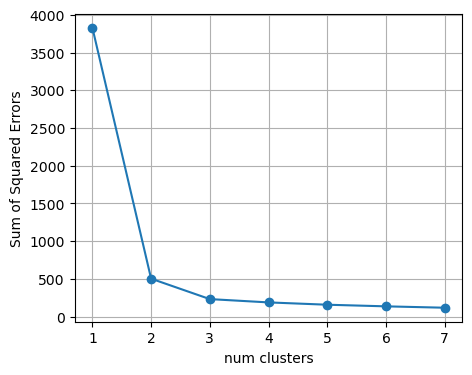

In [119]:
errors = []

for i in range(1,8):
    num_cluster_checker = KMeans(n_clusters=i)
    
    num_cluster_checker.fit(X)
    
    errors.append(num_cluster_checker.inertia_)

plt.figure(figsize=(5,4))    
plt.plot(range(1,8), errors, marker='o')
plt.xlabel("num clusters")
plt.ylabel("Sum of Squared Errors")
plt.grid(True)
plt.show()

In [120]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmean.labels_)

0.6234391752977015

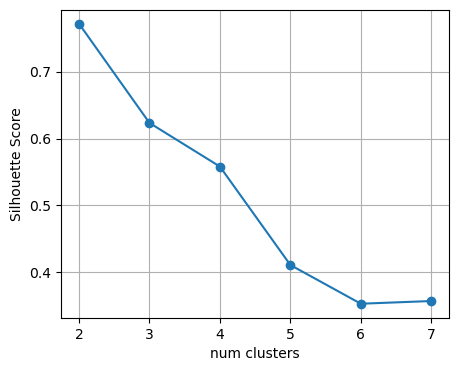

In [121]:
errors = []

for i in range(2,8):
    num_cluster_checker = KMeans(n_clusters=i)
    
    num_cluster_checker.fit(X)
    
    errors.append(silhouette_score(X, num_cluster_checker.labels_))

plt.figure(figsize=(5,4))    
plt.plot(range(2,8), errors, marker='o')
plt.xlabel("num clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [122]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [123]:
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [124]:
import PIL
image = np.asarray(PIL.Image.open(filepath))

In [125]:
image.shape

(533, 800, 3)

(-0.5, 799.5, 532.5, -0.5)

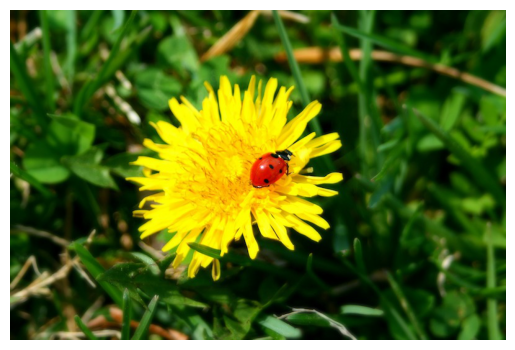

In [130]:
plt.imshow(image.astype('uint8'))
plt.axis("off")

In [127]:
XD = image.reshape(-1,3)

In [128]:
X = image.reshape(-1, 3)
kmean = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmean.cluster_centers_[kmean.labels_]
segmented_img = segmented_img.reshape(image.shape)

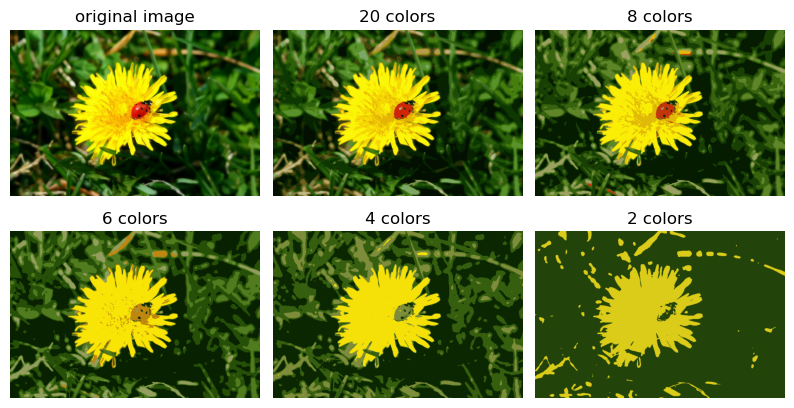

In [137]:
segmented_imgs = []
n_colors = [2,4,6,8,20]
n_colors.reverse()
for n_clusters in n_colors:
    kmean = KMeans(n_clusters, random_state=42).fit(X)
    segmented_img = kmean.cluster_centers_[kmean.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.1, wspace=0.05)

plt.subplot(2,3,1)
plt.title("original image")
plt.imshow(image)
plt.axis('off')

for indx, number_of_color in enumerate(n_colors):
    plt.subplot(2, 3, 2 + indx)
    plt.imshow(segmented_imgs[indx].astype("uint8"))
    plt.title(f"{number_of_color} colors")
    plt.axis('off')
plt.show()

In [142]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [145]:
from sklearn.linear_model import LogisticRegression
n_labled= 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:50],y_train[:50])

LogisticRegression(max_iter=10000)

In [161]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [162]:
k = 50
kmean = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmean.fit_transform(X_train)
representitive_digit_indx = np.argmin(X_digits_dist, axis=0)
X_representitve_digits = X_train[representitive_digit_indx]

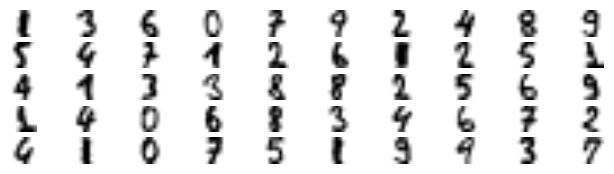

In [173]:
plt.figure(figsize=(8, 2))
for indx, image in enumerate(X_representitve_digits):
    plt.subplot(50// 10, 10, indx+1)
    plt.imshow(image.reshape(8,8), cmap='binary', interpolation='bilinear')
    plt.axis('off')
plt.show()

In [179]:
y_representative_digits = [1, 3, 6, 0, 7, 9, 2, 4, 8, 9, 
                           5, 4, 7, 1, 2, 6, 1, 2, 5, 1, 
                           4, 1, 3, 3, 8, 8, 2, 5, 6, 9, 
                           1, 4, 0, 6, 8, 3, 4, 6, 7, 2, 
                           4, 1, 0, 7, 5, 1, 9, 9, 3, 7]
len(y_representative_digits)

50

In [181]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representitve_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

In [184]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k): #k is the number of labels we are using in this case it is 50
    y_train_propagated[kmean.labels_ == i] = y_representative_digits[i] #We do this to go from labels 0-49 to 0-9 to 'label' all the X_train

In [195]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8967254408060453

In [261]:
percentile_99 = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmean.labels_] 
for i in range(k):
    in_cluster = (kmean.labels_ == i)
    cluster_i_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_i_dist, percentile_99)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    #print(np.unique((in_cluster & above_cutoff), return_counts=True))
    X_cluster_dist[in_cluster & above_cutoff] = -1 #finds the outliers

partially_propogagated = (X_cluster_dist != -1)
X_train_partially_propogated = X_train[partially_propogagated]
y_train_partially_propogated = y_train_propagated[partially_propogagated]

In [262]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propogated, y_train_partially_propogated)
log_reg.score(X_test, y_test)

0.9093198992443325

In [263]:
(y_train_partially_propogated == y_train[partially_propogagated]).mean() #checking how right we are about the new labels

0.9755555555555555

In [268]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1_000, noise=0.05)
dbscan = DBSCAN(min_samples=5, eps=0.05)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [271]:
dbscan.labels_[:100]

array([ 0,  1,  0,  0,  2,  0,  1,  2,  0,  2,  2,  0,  0,  3,  2,  2,  0,
        3,  0,  2,  0,  2,  3,  3,  3,  4,  0,  0,  3,  0,  2, -1,  3,  1,
       -1,  0,  2, -1,  3,  3,  3,  5,  2,  0,  3,  0,  0,  2,  3,  3,  2,
       -1,  0,  2, -1,  0,  1,  3, -1,  3, -1,  1,  5,  0,  4,  0,  0,  2,
        2,  3,  3,  0,  0,  0, -1,  0,  0,  2,  2, -1,  0, -1,  0,  2,  2,
        0,  2, -1, -1,  0, -1,  1,  0,  2,  0,  1,  0,  0,  0,  0],
      dtype=int64)

In [274]:
print(len(dbscan.labels_))
print(len(dbscan.components_))

1000
801


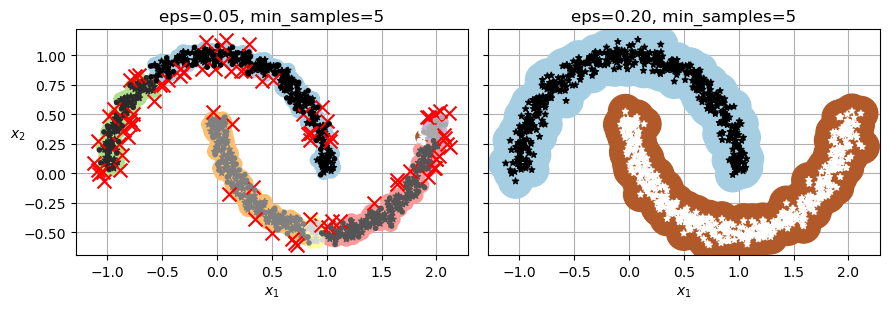

In [284]:

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [292]:
dbscan = dbscan2

In [295]:
from sklearn.neighbors import KNeighborsClassifier
#dbscan does not have a predict method so we are using KNN to do it
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [296]:
X_new = np.array([[-0.5, 0], [0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

c:\Users\travi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, 1], dtype=int64)

In [297]:
knn.predict_proba(X_new)

array([[0.82, 0.18],
       [0.  , 1.  ],
       [0.8 , 0.2 ],
       [0.  , 1.  ]])

In [306]:
y_dist, y_pred_indx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_indx]
y_pred[y_dist> 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1], dtype=int64)

In [308]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [310]:
gm.weights_

array([0.20298961, 0.21188876, 0.58512163])